# Classical Travelling Salesman Problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Construct N Cities

In [4]:
def construct_cities(N):
    """
    Construct an array of random points of size N.
    """
    Cities = []
    for city in range(N):
        Cities.append(np.random.rand(2) * 10)
    return np.array(Cities)

In [5]:
## Example 1 :- Constructing 4 Cities

In [6]:
Cities = construct_cities(4)

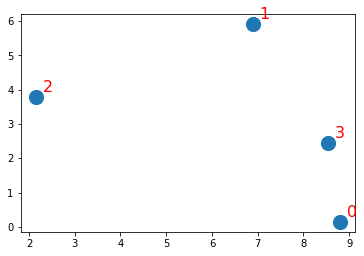

In [8]:
from scripts.plots import plot_cities
plot_cities(Cities)

In [10]:
import itertools

def distance_between_points(point_a, point_b):
    return np.sqrt((point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2)

def get_distance_matrix(Cities):
    number_of_cities = len(Cities)
    matrix = np.zeros((number_of_cities, number_of_cities))
    for city1 in range(number_of_cities):
        for city2 in range(city1, number_of_cities):
            matrix[city1][city2] = distance_between_points(Cities[city1], Cities[city2])
            matrix[city2][city1] = matrix[city1][city2]
    return matrix

In [11]:
distance_matrix = get_distance_matrix(Cities)
print(distance_matrix)

[[0.         6.07884357 7.58941222 2.3087537 ]
 [6.07884357 0.         5.18854911 3.84910826]
 [7.58941222 5.18854911 0.         6.53493254]
 [2.3087537  3.84910826 6.53493254 0.        ]]


In [12]:
def calculate_cost(cost_matrix, solution):
    cost = 0
    return sum([cost_matrix[a][b] for a, b  in zip(solution[:-1], solution[1:])])


def solve_tsp_brute_force(cities, starting_city, verbose=True):
    number_of_cities = len(Cities)
    initial_order = range(number_of_cities)
    cost_matrix = get_distance_matrix(Cities)
    
    all_permutations = [list(x) for x in itertools.permutations(initial_order)]
    best_permutation = all_permutations[0]
    best_cost = calculate_cost(cost_matrix, best_permutation)*1000

    for perm in all_permutations:
        if perm[0] != starting_city:
            continue
        current_cost = calculate_cost(cost_matrix, perm)
        if current_cost < best_cost:
            best_permutation = perm
            best_cost = current_cost
    if verbose:
        print("Efficient Route:", best_permutation)
        print("Cost:", best_cost)
    return best_permutation

In [13]:
solution = solve_tsp_brute_force(Cities, 0)

Efficient Route: [0, 3, 1, 2]
Cost: 11.346411067227216


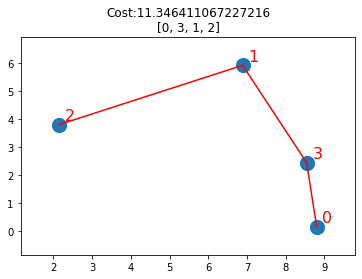

In [14]:
from scripts.plots import plot_solution
plot_solution(Cities, solution)

In [ ]:
#Example 2 :- Constructing 6 Cities

Efficient Route: [0, 3, 1, 2]
Cost: 11.346411067227216


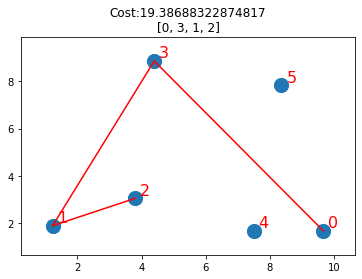

In [16]:
sixcities = construct_cities(6)
solution = solve_tsp_brute_force(sixcities, 0)
plot_solution(sixcities, solution)

Efficient Route: [0, 3, 1, 2]
Cost: 11.346411067227216


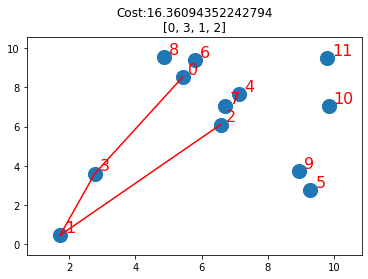

In [18]:
twelve = construct_cities(12)
solution = solve_tsp_brute_force(twelve, 0)
plot_solution(twelve, solution)

In [20]:
for City in range(3, 10):
    print(City, "Cities")
    %time solution = solve_tsp_brute_force(construct_cities(City), 0, verbose=False)

3 Cities
CPU times: user 376 µs, sys: 0 ns, total: 376 µs
Wall time: 296 µs
4 Cities
CPU times: user 196 µs, sys: 28 µs, total: 224 µs
Wall time: 206 µs
5 Cities
CPU times: user 888 µs, sys: 89 µs, total: 977 µs
Wall time: 705 µs
6 Cities
CPU times: user 536 µs, sys: 0 ns, total: 536 µs
Wall time: 416 µs
7 Cities
CPU times: user 871 µs, sys: 0 ns, total: 871 µs
Wall time: 592 µs
8 Cities
CPU times: user 556 µs, sys: 79 µs, total: 635 µs
Wall time: 450 µs
9 Cities
CPU times: user 1.33 ms, sys: 37 µs, total: 1.37 ms
Wall time: 1.01 ms


3 Cities
173 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4 Cities
180 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5 Cities
161 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6 Cities
177 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7 Cities
166 µs ± 8.93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8 Cities
182 µs ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9 Cities
166 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10 Cities
169 µs ± 8.57 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11 Cities
162 µs ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


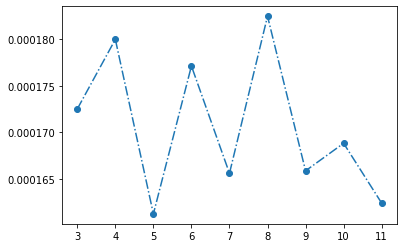

In [22]:
calculation = []
city_sizes = range(3, 12)

for city in city_sizes:
    print(city, "Cities")
    calc_time = %timeit -o -n 100 solve_tsp_brute_force(construct_cities(i), 0, verbose=False) 
    calculation.append(calc_time.average)

plt.plot(list(city_sizes), calculation, 'o-.')

In [23]:
from scripts import simulated_annealing 
from scripts.simulated_annealing import SimulatedAnnealer

def solve_tsp_simulated_annealing(Cities, starting_city):
    sa = SimulatedAnnealer(Cities, stopping_iter=5000, starting_city=starting_city)
    sa.anneal()
    solution = sa.get_best_solution()

    return solution

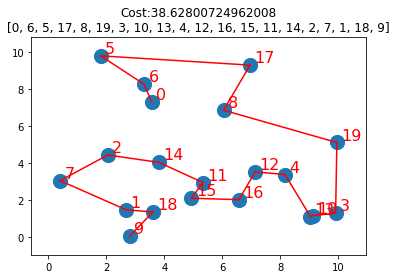

In [27]:
cities = create_cities(20)
sa_solution = solve_tsp_simulated_annealing(cities, 0)
plot_solution(cities, sa_solution)